In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


In [4]:
dummy_model_prob = [0 for _ in range(len(y_test))]

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
model_prob = model.predict_proba(x_test)

In [7]:
model_prob

array([[9.59354198e-01, 4.06458016e-02],
       [3.55102587e-01, 6.44897413e-01],
       [4.61036991e-01, 5.38963009e-01],
       [1.26765534e-01, 8.73234466e-01],
       [3.98492560e-01, 6.01507440e-01],
       [5.89004681e-01, 4.10995319e-01],
       [7.11999710e-02, 9.28800029e-01],
       [7.50321930e-01, 2.49678070e-01],
       [9.54385644e-01, 4.56143559e-02],
       [9.69602884e-01, 3.03971159e-02],
       [1.33956156e-01, 8.66043844e-01],
       [5.31819848e-01, 4.68180152e-01],
       [1.72347404e-01, 8.27652596e-01],
       [9.67809354e-01, 3.21906457e-02],
       [2.30046680e-01, 7.69953320e-01],
       [6.14802703e-01, 3.85197297e-01],
       [5.64943790e-01, 4.35056210e-01],
       [9.92521843e-01, 7.47815672e-03],
       [6.25866400e-01, 3.74133600e-01],
       [9.86718726e-01, 1.32812744e-02],
       [9.84853282e-01, 1.51467175e-02],
       [4.15877937e-02, 9.58412206e-01],
       [8.20879654e-01, 1.79120346e-01],
       [2.69178122e-02, 9.73082188e-01],
       [2.755166

In [8]:
model_prob[:, 1]

array([4.06458016e-02, 6.44897413e-01, 5.38963009e-01, 8.73234466e-01,
       6.01507440e-01, 4.10995319e-01, 9.28800029e-01, 2.49678070e-01,
       4.56143559e-02, 3.03971159e-02, 8.66043844e-01, 4.68180152e-01,
       8.27652596e-01, 3.21906457e-02, 7.69953320e-01, 3.85197297e-01,
       4.35056210e-01, 7.47815672e-03, 3.74133600e-01, 1.32812744e-02,
       1.51467175e-02, 9.58412206e-01, 1.79120346e-01, 9.73082188e-01,
       9.72448333e-01, 8.30594028e-01, 5.34880047e-01, 5.01947079e-02,
       1.01271477e-02, 9.78796168e-01, 9.39496987e-01, 9.03685540e-01,
       3.32875972e-02, 9.09991853e-01, 3.73998905e-01, 2.97027861e-01,
       2.38095666e-02, 8.71594115e-01, 1.16130995e-01, 8.72274801e-01,
       4.94110975e-01, 9.60669805e-01, 5.14429540e-01, 5.97528168e-01,
       4.50531614e-01, 9.29428748e-03, 1.02563467e-02, 7.03736490e-01,
       6.16371699e-03, 8.14269269e-01, 8.37199507e-01, 9.15848577e-01,
       9.54156270e-01, 8.88000453e-01, 1.89425508e-01, 6.55788687e-02,
      

In [9]:
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob[:, 1])
print(dummy_model_auc)
print(model_auc)

0.5
0.9232456140350878


In [14]:
dummy_fpr , dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob[:, 1])

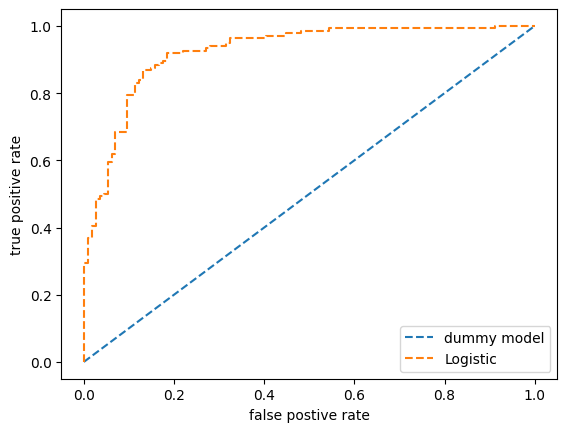

In [15]:
## creating the ROC
from matplotlib import pyplot
pyplot.plot(dummy_fpr, dummy_tpr, linestyle = "--", label = "dummy model")
pyplot.plot(model_fpr, model_tpr, linestyle = "--", label = "Logistic")
pyplot.xlabel("false postive rate")
pyplot.ylabel("true positive rate")
pyplot.legend()
pyplot.show()


In [16]:
thresholds

array([           inf, 9.99553764e-01, 9.39496987e-01, 9.36732025e-01,
       9.13252414e-01, 9.09991853e-01, 8.95270782e-01, 8.95036262e-01,
       8.69913569e-01, 8.66043844e-01, 8.57581727e-01, 8.48810315e-01,
       8.45140783e-01, 8.42623874e-01, 8.03371057e-01, 8.01282475e-01,
       7.89459343e-01, 7.76579862e-01, 7.28221281e-01, 7.13478526e-01,
       6.01507440e-01, 5.82911698e-01, 5.14429540e-01, 5.04637901e-01,
       5.03669367e-01, 5.03073298e-01, 4.69001994e-01, 4.63040656e-01,
       4.56979367e-01, 4.55023943e-01, 4.50531614e-01, 4.36245243e-01,
       4.35056210e-01, 4.19808622e-01, 4.14620476e-01, 4.10995319e-01,
       3.90139627e-01, 3.66392184e-01, 3.62088932e-01, 2.97027861e-01,
       2.81723864e-01, 2.71874667e-01, 2.58848472e-01, 2.32154964e-01,
       2.31693719e-01, 2.30369604e-01, 2.03918182e-01, 1.38454674e-01,
       1.35189789e-01, 1.29272162e-01, 1.28501963e-01, 1.18052536e-01,
       1.16130995e-01, 8.98411999e-02, 8.75397210e-02, 9.23284478e-03,
      

### now , we will go through each threshold and get the TPR and FPR , and where the TPR will be th ehigest and PFR will be lowest we will take that theshold for the Logistic regression